# Statistics

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [17]:
early = pd.read_json('../data/early_access.json').transpose().dropna(how = 'any').apply(pd.to_numeric, errors='ignore')
ex_early = pd.read_json('../data/ex_early_access.json').transpose().dropna(how = 'any').apply(pd.to_numeric, errors='ignore')
games = pd.read_json('../data/all_games.json').transpose().dropna(how = 'any').apply(pd.to_numeric, errors='ignore')

In [18]:
early['userscore'] = early['positive'] / (early['negative'] + early['positive']) * 100
ex_early['userscore'] = ex_early['positive'] / (ex_early['negative'] + ex_early['positive']) * 100
games['userscore'] = games['positive'] / (games['negative'] + games['positive']) * 100

In [19]:
early['status'] = 'early access'
ex_early['status'] = 'ex early access'
games['status'] = 'full release'

games = games.append(early)
games = games.append(ex_early)

games.drop_duplicates(['appid'], keep = 'last', inplace = True)
games['total reviews'] = games['negative'] + games['positive']
games.appid.count()

15744

In [33]:
games = games[games['total reviews'] > 25]
games.head()

,appid,average_2weeks,average_forever,developer,median_2weeks,median_forever,name,negative,owners,owners_variance,...,players_2weeks_variance,players_forever,players_forever_variance,positive,price,publisher,score_rank,userscore,status,total reviews
10,10,577,11400,Valve,65,402,Counter-Strike,2268,14193624,114203,...,20654,9939125,95998,101728,999,Valve,97.0,97.819147,full release,103996
100,100,166,194,Valve,16,33,Counter-Strike: Condition Zero,1015,11558779,103348,...,5052,2080610,44285,9159,999,Valve,74.0,90.023590,full release,10174
1002,1002,0,46,Mark Healey,0,16,Rag Doll Kung Fu,18,38599,6044,...,0,11876,3353,38,999,Mark Healey,24.0,67.857143,full release,56
100400,100400,1197,3433,Nevercenter Ltd. Co.,1197,706,Silo 2,15,6433,2467,...,1463,5196,2217,43,9999,Nevercenter Ltd. Co.,34.0,74.137931,full release,58
100410,100410,0,855,Nevercenter Ltd. Co.,0,97,CameraBag 2,32,14103,3653,...,0,12371,3422,98,0,Nevercenter Ltd. Co.,36.0,75.384615,full release,130


## What kind of data do we have?

How many games do we have?

status
early access        903
ex early access     938
full release       9390
Name: appid, dtype: int64


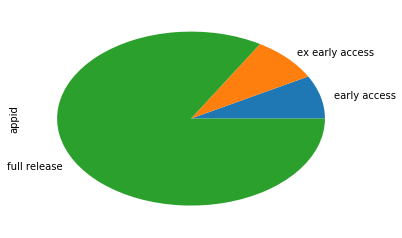

In [25]:
grouped = games.groupby('status')
print grouped['appid'].count()
grouped['appid'].count().plot(kind = 'pie')

Average UserScore Comparison

status
early access       73.073696
ex early access    73.305121
full release       73.749242
Name: userscore, dtype: float64


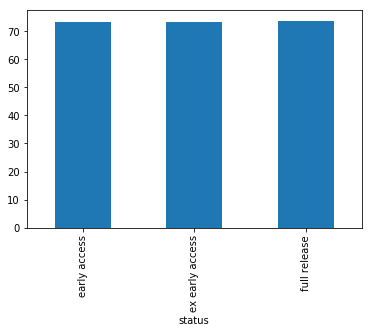

In [26]:
print grouped['userscore'].mean()
grouped['userscore'].mean().plot(kind= 'bar')

status
early access       76.521739
ex early access    76.267889
full release       77.843372
Name: userscore, dtype: float64


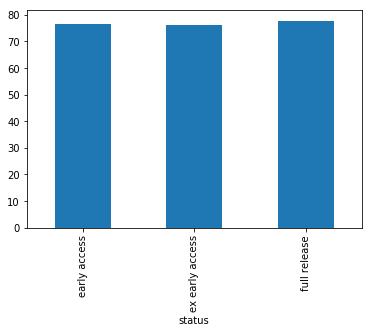

In [27]:
print grouped['userscore'].median()
grouped['userscore'].median().plot(kind= 'bar')

Average Price Comparison

status
early access       1029.074197
ex early access    1001.372068
full release        863.687966
Name: price, dtype: float64
status
early access       999
ex early access    799
full release       499
Name: price, dtype: int64


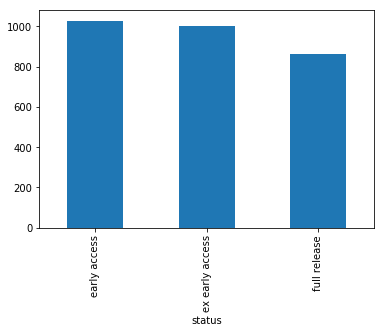

In [31]:
print grouped['price'].mean()
print grouped['price'].median()
grouped['price'].mean().plot(kind= 'bar')

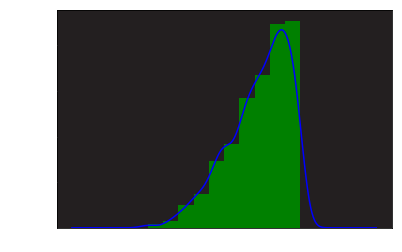

In [32]:
fig = early.userscore.plot(kind = 'kde', color = 'blue')
early.userscore.plot(kind = 'hist', normed = True, color = 'green')
fig.set_facecolor('#231f20')
fig.xaxis.label.set_color('white')
fig.yaxis.label.set_color('white')
fig.tick_params(axis='x', colors='white')
fig.tick_params(axis='y', colors='white')

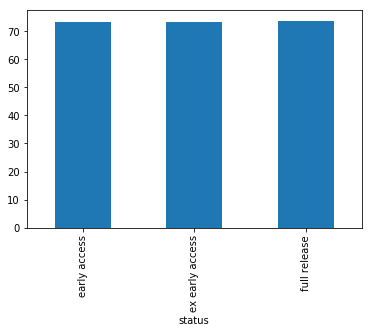

In [30]:
grouped = games.groupby('status')
grouped['userscore'].mean().plot( kind = 'bar')

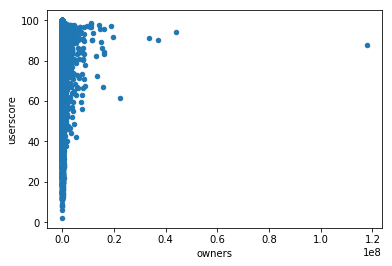

In [34]:
games.plot(kind = 'scatter', x = 'owners', y = 'userscore')

In [35]:
print grouped['owners'].mean()
print grouped['owners'].median()

status
early access       175798.017719
ex early access    262973.780384
full release       273918.450479
Name: owners, dtype: float64
status
early access       11876
ex early access    22887
full release       40083
Name: owners, dtype: int64


In [37]:
print grouped['players_forever'].mean()
print grouped['players_forever'].median()

status
early access       145746.522702
ex early access    194657.852878
full release       178717.919276
Name: players_forever, dtype: float64
status
early access        7423
ex early access    14846
full release       19794
Name: players_forever, dtype: int64
